In [1]:
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2hsv, hsv2rgb

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import seaborn

seaborn.set()
%matplotlib inline

In [2]:
current_image = imread("./maurilio.jpg")
current_image = resize(current_image, (256,256), mode="reflect", anti_aliasing=True)
current_image_hsv = rgb2hsv(current_image)

In [3]:
import pandas as pd
pd.DataFrame(current_image.reshape(-1,3),columns = ["R","G","B"]).head()

,R,G,B
0,0.294118,0.278431,0.282353
1,0.294118,0.278431,0.282353
2,0.294118,0.278431,0.282353
3,0.294118,0.278431,0.282353
4,0.294118,0.282353,0.282353


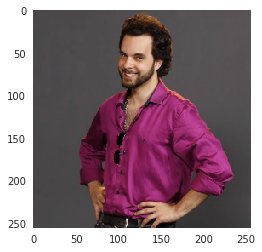

In [4]:
plt.imshow(current_image)
plt.grid(False)

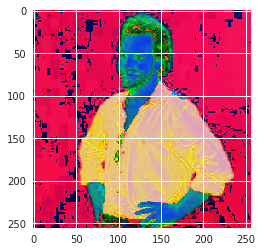

In [5]:
plt.imshow(current_image_hsv)

In [6]:
pixel_list = current_image_hsv.reshape(-1,3)

Text(0,0.5,'Inercia')

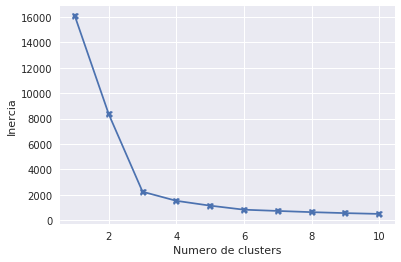

In [7]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(pixel_list)
    inertia.append((i,kmeans.inertia_))
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(pixel_list)
cluster_list = kmeans.labels_
cluster_mask = cluster_list.reshape(256,256)

In [9]:
cmap = ListedColormap(hsv2rgb(kmeans.cluster_centers_.reshape(1,3,3)).reshape(3,3))
bounds=[0,1,2]
norm = BoundaryNorm(bounds, cmap.N)

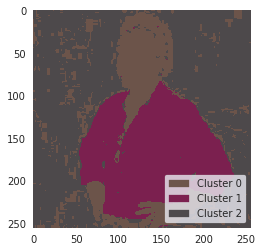

In [10]:
plt.imshow(cluster_mask, cmap=cmap)
patches =[Patch(color=c, label="Cluster {}".format(i)) for i,c in enumerate(cmap.colors)]
plt.legend(handles=patches, loc=4, frameon=True)
plt.grid(False)

In [11]:
masked_image = np.dstack((current_image, cluster_mask==1))

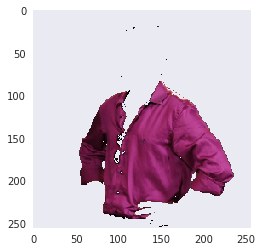

In [12]:
plt.imshow(masked_image)
plt.grid(False)

In [13]:
masked_image = np.dstack((current_image, cluster_mask!=1))

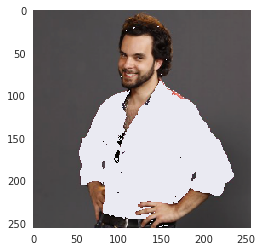

In [14]:
plt.imshow(masked_image)
plt.grid(False)